## Import the relevant Test

In [142]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load data

In [143]:
raw_data = pd.read_csv("insurance.csv")
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [201]:
data = raw_data.copy()
data['smoker'] = data['smoker'].map({"yes":1, "no":0})
data.head()  

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


## Variable

In [202]:
y = data['smoker']
# y = data['sex']
# x1 = data['bmi']
x1 = data['charges']

## Scatter plot

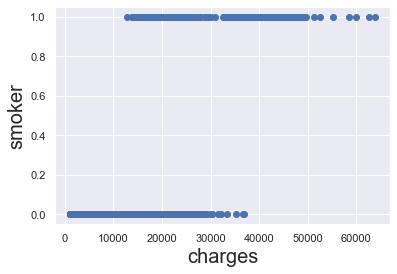

In [203]:
plt.scatter(x1, y)
plt.xlabel('charges', fontsize=20)
plt.ylabel('smoker', fontsize=20)
plt.show()

## Plot with regression line

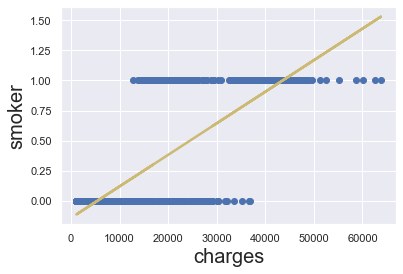

In [204]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_reg_lin = reg_lin.fit()

plt.scatter(x1,y,color = 'C0')

y_hat = x1*results_reg_lin.params[1]+results_reg_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')

plt.xlabel('charges', fontsize = 20)
plt.ylabel('smoker', fontsize = 20)
plt.show()

## Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.188209
         Iterations 8


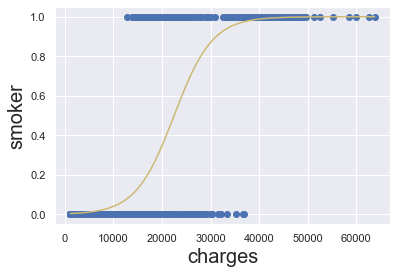

In [205]:
reg_log = sm.Logit(y,x)
results_reg_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_reg_log.params[0],results_reg_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.plot(x_sorted,f_sorted,color='C8')

plt.scatter(x1,y,color='C0')
plt.xlabel('charges', fontsize = 20)
plt.ylabel('smoker', fontsize = 20)
plt.show()

## Summary

In [206]:
reg_log = sm.Logit(y,x)
results_reg_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.188209
         Iterations 8


In [207]:
results_reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 smoker   No. Observations:                 1338
Model:                          Logit   Df Residuals:                     1336
Method:                           MLE   Df Model:                            1
Date:                Wed, 29 Sep 2021   Pseudo R-squ.:                  0.6288
Time:                        16:22:48   Log-Likelihood:                -251.82
converged:                       True   LL-Null:                       -678.32
Covariance Type:            nonrobust   LLR p-value:                1.633e-187
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6985      0.306    -18.594      0.000      -6.299      -5.098
charges        0.0003   1.59e-05     15.912      0.000       0.000       0.000
==============================================================================
"""

## Accuracy

In [208]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_reg_log.predict()

array([0.19, 0.01, 0.01, ..., 0.01, 0.01, 0.84])

In [209]:
np.array(data['sex'])

array(['female', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [210]:
results_reg_log.pred_table()

array([[1018.00, 46.00],
       [89.00, 185.00]])

In [211]:
confusion_matrix = pd.DataFrame(results_reg_log.pred_table())
confusion_matrix.columns = ['Prediction 0', 'Prediction 1']
confusion_matrix = confusion_matrix.rename(index={0: 'Actual 0', 1: 'Actual 1'})
confusion_matrix

,Prediction 0,Prediction 1
Actual 0,1018.0,46.0
Actual 1,89.0,185.0


In [217]:
(1018+185)/(1018+46+89+185)

0.899103139013453